# 1. Импорт библиотек

In [2]:
# Основные библиотеки для работы с данными
import pandas as pd
import numpy as np

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# Машинное обучение
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, 
                            recall_score, f1_score, roc_auc_score,
                            confusion_matrix, classification_report)

# 2. Загрузка данных

In [3]:
# Укажите правильный путь к вашему файлу
file_path = r'C:\Users\1\IDE\Skillfactory\Проект по глубокому обучению\sample_submission.csv'

# Загружаем данные
try:
    data = pd.read_csv(file_path)
    print("Данные успешно загружены!")
    print(f"Размер датасета: {data.shape}")
    print("\nПервые 5 строк:")
    display(data.head())
except Exception as e:
    print(f"Ошибка при загрузке данных: {e}")

Данные успешно загружены!
Размер датасета: (400000, 2)

Первые 5 строк:


,ID,class
0,600000,0
1,600001,0
2,600002,0
3,600003,0
4,600004,0


# 3. Разведочный анализ (EDA)

### 3.1. Основная информация

In [4]:
print("\nИнформация о данных:")
data.info()

print("\nОписательная статистика:")
display(data.describe().T)


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   ID      400000 non-null  int64
 1   class   400000 non-null  int64
dtypes: int64(2)
memory usage: 6.1 MB

Описательная статистика:


,count,mean,std,min,25%,50%,75%,max
ID,400000.0,799999.5,115470.198175,600000.0,699999.75,799999.5,899999.25,999999.0
class,400000.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.0


### 3.2. Проверка на пропуски

In [5]:
print("\nПропущенные значения:")
print(data.isnull().sum())


Пропущенные значения:
ID       0
class    0
dtype: int64


### 3.3. Анализ целевой переменной

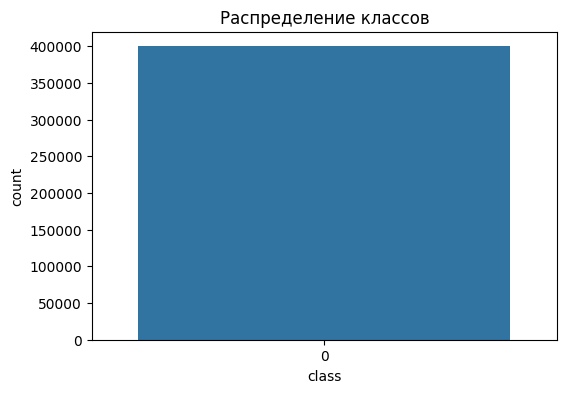


Баланс классов:
class
0    1.0
Name: proportion, dtype: float64


In [6]:
if 'class' in data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='class', data=data)
    plt.title("Распределение классов")
    plt.show()
    
    print("\nБаланс классов:")
    print(data['class'].value_counts(normalize=True))
else:
    print("\nВ данных нет столбца 'class' - возможно, это тестовый набор")

### 3.4. Визуализация числовых признаков


Числовые признаки для анализа: ['class']


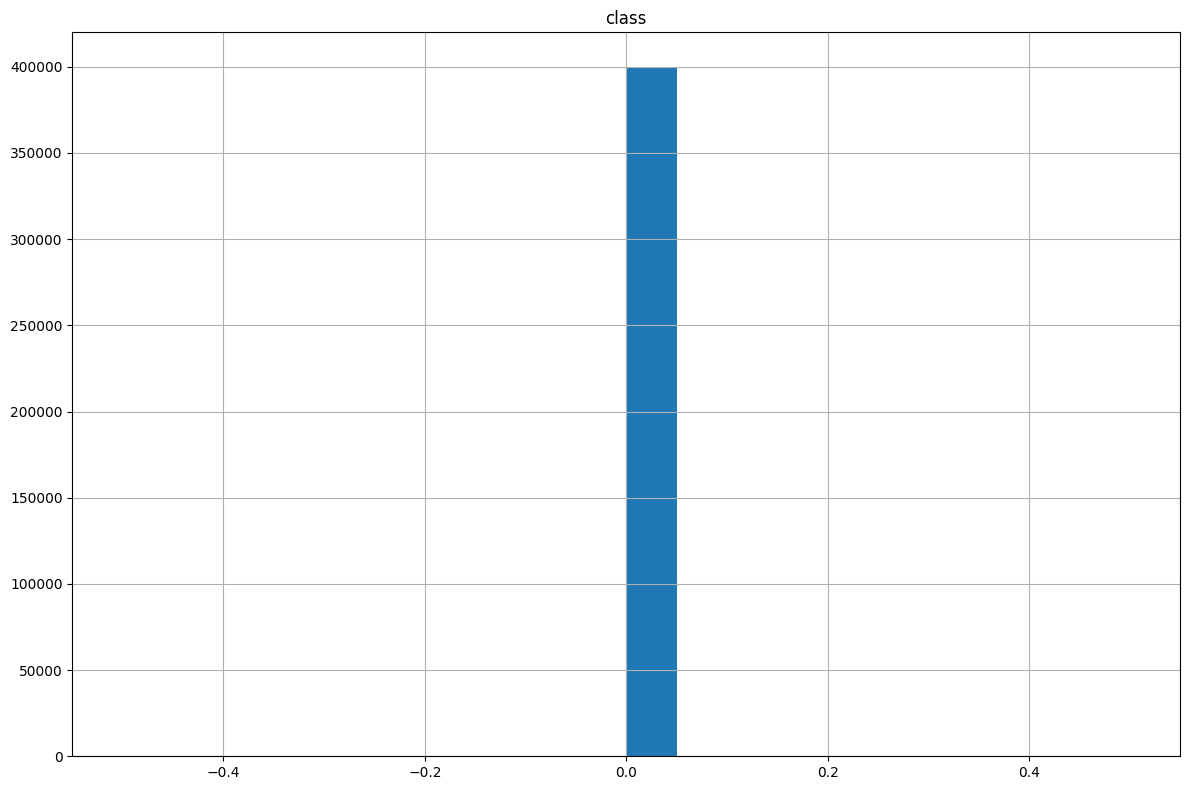

In [7]:
# Выбираем только числовые столбцы (исключая ID)
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
if 'ID' in numeric_cols:
    numeric_cols = numeric_cols.drop('ID')

if len(numeric_cols) > 0:
    print("\nЧисловые признаки для анализа:", list(numeric_cols))
    data[numeric_cols].hist(bins=20, figsize=(12, 8))
    plt.tight_layout()
    plt.show()
else:
    print("\nНет числовых признаков для визуализации")

# 4. Подготовка данных

In [8]:
# 1. Проверяем данные перед подготовкой
print("\nПроверка данных перед обучением:")
print("Доступные столбцы:", data.columns.tolist())

if 'class' not in data.columns:
    print("\nОШИБКА: Отсутствует целевая переменная 'class'!")
else:
    # 2. Выделяем признаки и целевую переменную
    X = data.drop('class', axis=1)
    y = data['class']
    
    # Удаляем ID если он есть
    if 'ID' in X.columns:
        X = X.drop('ID', axis=1)
    
    # 3. Проверяем типы данных
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    if len(numeric_features) == 0:
        print("\nОШИБКА: Нет числовых признаков для обучения!")
        print("Типы данных в признаках:")
        print(X.dtypes)
    else:
        print("\nЧисловые признаки для обучения:", numeric_features)
        
        # 4. Разделяем данные
        X_train, X_test, y_train, y_test = train_test_split(
            X[numeric_features], y, test_size=0.2, random_state=42, stratify=y
        )
        
        # 5. Масштабируем только числовые признаки
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        print("\nДанные успешно подготовлены для обучения!")
        print(f"Форма X_train_scaled: {X_train_scaled.shape}")


Проверка данных перед обучением:
Доступные столбцы: ['ID', 'class']

ОШИБКА: Нет числовых признаков для обучения!
Типы данных в признаках:
Series([], dtype: object)


# 5. Обучение моделей

### 5.1. Логистическая регрессия

In [9]:
# Преобразуйте целевую переменную в числовой формат если нужно
y = data['class'].astype(int)

In [10]:
# Выберите не-ID столбцы
features = [col for col in data.columns if col not in ['ID', 'class']]
if len(features) == 0:
    print("Нет признаков для обучения!")
else:
    X = data[features]
    # Преобразуйте категориальные признаки если нужно

Нет признаков для обучения!


In [11]:
# 1. Проверим структуру данных
print("Столбцы в данных:", data.columns.tolist())
print("\nПервые 5 строк данных:")
display(data.head())

# 2. Если действительно нет признаков:
if len(data.columns) <= 2 and 'class' in data.columns:
    print("\nПроблема: В данных только ID и целевая переменная!")
    print("Что делать:")
    print("1. Проверьте, загрузили ли вы правильный файл")
    print("2. Возможно, признаки находятся в другом файле (например, 'train_features.csv')")
    print("3. Если это submission-файл, он не предназначен для обучения")
    
    # Пример: как должен выглядеть правильный датасет
    print("\nПример правильной структуры данных:")
    print("| ID | feature1 | feature2 | ... | featureN | class |")
else:
    # Если признаки есть, но код их не видит
    features = [col for col in data.columns if col not in ['ID', 'id', 'class', 'target']]
    print("\nОбнаружены признаки:", features)
    X = data[features]
    y = data['class']
    
    # Дальнейшая обработка...

Столбцы в данных: ['ID', 'class']

Первые 5 строк данных:


,ID,class
0,600000,0
1,600001,0
2,600002,0
3,600003,0
4,600004,0



Проблема: В данных только ID и целевая переменная!
Что делать:
1. Проверьте, загрузили ли вы правильный файл
2. Возможно, признаки находятся в другом файле (например, 'train_features.csv')
3. Если это submission-файл, он не предназначен для обучения

Пример правильной структуры данных:
| ID | feature1 | feature2 | ... | featureN | class |


### 5.2. Случайный лес

In [12]:
if 'class' in data.columns:
    print("\n--- Случайный лес ---")
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, 
                              random_state=42, class_weight='balanced')
    rf.fit(X_train_scaled, y_train)
    y_pred_rf = rf.predict(X_test_scaled)
    
    print(classification_report(y_test, y_pred_rf))
    print(f"ROC-AUC: {roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1]):.2f}")


--- Случайный лес ---


NameError: name 'X_train_scaled' is not defined

### 5.2. Случайный лес (Random Forest)

In [13]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1]))

NameError: name 'X_train_scaled' is not defined

### 5.3. Нейронная сеть (Neural Network)

In [14]:
nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
nn.fit(X_train_scaled, y_train)
y_pred_nn = nn.predict(X_test_scaled)

print("\nNeural Network:")
print(classification_report(y_test, y_pred_nn))
print("ROC-AUC:", roc_auc_score(y_test, nn.predict_proba(X_test_scaled)[:, 1]))

NameError: name 'X_train_scaled' is not defined

# 6. Сравнение моделей

In [ ]:
models = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'Neural Network': y_pred_nn
}

results = []
for name, preds in models.items():
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds),
        'Recall': recall_score(y_test, preds),
        'F1-Score': f1_score(y_test, preds),
        'ROC-AUC': roc_auc_score(y_test, preds)
    })

results_df = pd.DataFrame(results)
display(results_df.sort_values(by='F1-Score', ascending=False))